In [11]:
import matplotlib.pyplot as plt
import os

from plotters import *

In [12]:
######## Set the environment variable in the Python environment (if haven't done already) ########
# os.environ['RL_CMAES_ROOT'] = '/path/to/RL_CMAES/root'

path = os.environ['RL_CMAES_ROOT']

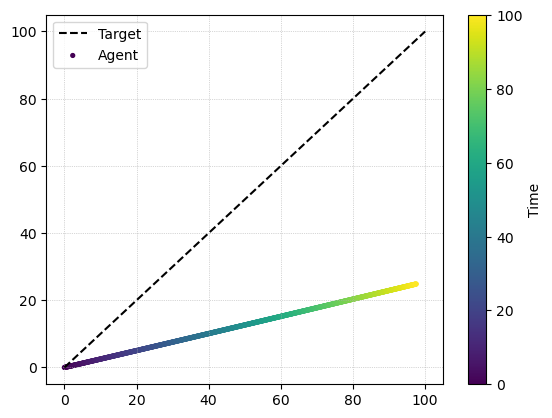

In [13]:
plot_result_and_trajectory(path + '/trajectories/straight.csv', path + '/sim_results/test.csv')
plt.grid(ls=':', lw=0.5)
plt.show()

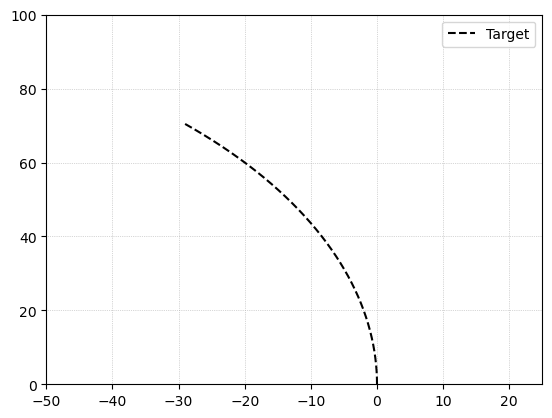

In [14]:
plot_trajectory(path + '/trajectories/arc.csv')

plt.xlim((-50, 25))
plt.ylim((0, 100))
plt.grid(ls=':', lw=0.5)
plt.show()